# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:**  Lucas Caceres \
**Email:**. lc4630

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [ ]:
#Todo
#For the first I would do a 70 15 15 split for Training/Validation/Test because it is a smaller
# dataset and I don't want it to overfit
#I would do a 80 10 10 Split for Training/Validation/Test, for the second I would do this because 
#There is only one person so no worries about overfitting


### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


Nearest point: [(1, 2)]


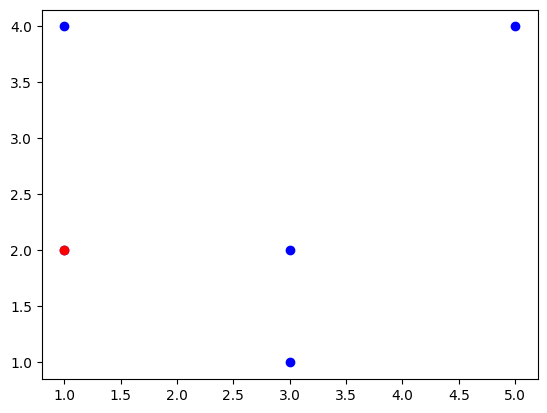

Nearest point (second dataset): [(100, 2)]


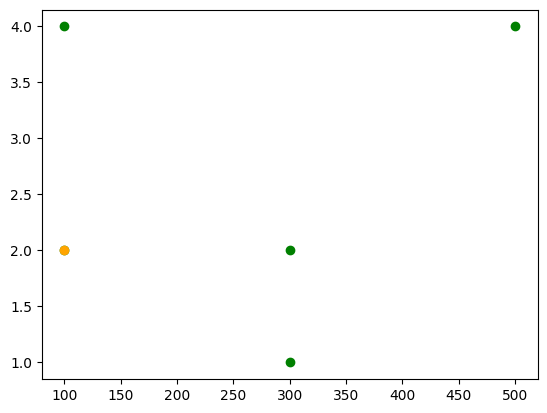

In [15]:
#Todo
import matplotlib.pyplot as plt

points = [(1,2),(1,4),(5,4),(3,1),(3,2)]

def k_nearest_neighbors(points,qpoint,k):
    distances = []
    for point in points:
        dist = ((point[0]-qpoint[0])**2 + (point[1]-qpoint[1])**2)
        distances.append((dist,point))
        distances.sort(key=lambda x:x[0])
        return [point for dist, point in distances[:k]]
    
nearest = k_nearest_neighbors(points, (0,0), 1)
print("Nearest point:", nearest)

x_points, y_points = zip(*points)  
plt.scatter(x_points, y_points, color='blue', label='Points')
plt.scatter(*nearest[0], color='red', label='Nearest Point')

plt.show()
points2 = [(100, 2), (100, 4), (500, 4), (300, 1), (300, 2)]
nearest2 = k_nearest_neighbors(points2, (0, 0), 1)
print("Nearest point (second dataset):", nearest2)

# Plotting second dataset
x_points2, y_points2 = zip(*points2)  
plt.scatter(x_points2, y_points2, color='green', label='Points (Dataset 2)')
plt.scatter(*nearest2[0], color='orange', label='Nearest Point (Dataset 2)')

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [ ]:
#Todo

# Part 1
    # Yes, computing on both the training and test sets allows you to 
    # measure and compare the classification error rates
# Part 2
    #The perceptron seeks to maxmimize the dots in its function. 
    #Therefore the training error is whatever margin is missed which is 0 in linearly seperable functions

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self,w=None,b=0.0):
        self.w = w
        self.b = b
        self.history = []  

    def predict(self, x):
        if self.w is None:
            self.w = np.zeros_like(x, dtype=float)
        s = float(np.dot(self.w, x) + self.b)
        return 1 if s >= 0 else -1

    def train_step(self, x, y):
        if self.w is None:
            self.w = np.zeros_like(x, dtype=float)

        prediction = self.predict(x)

        # Save state before update
        self.history.append({
            'w': self.w.copy(),
            'b': float(self.b),
            'x': x.copy(),
            'y': int(y),
            'pred': int(prediction),
            'correct': (prediction == y)
        })

        # Update if wrong
        if prediction != y:
            self.w = self.w + (y * x)
            self.b = self.b + y
            return False  # Made an update
        return True  # Correct prediction

X_pos = np.array([10.0, -2.0])  # positive example
X_neg = np.array([12.0,  2.0])  # negative example
y_pos = 1
y_neg = -1

X_perceptron = np.vstack([X_pos, X_neg])
y_perceptron = np.array([y_pos, y_neg])

p = Perceptron()
updates = 0
for epoch in range(100):
    any_update = False
    for x, y in zip(X_perceptron, y_perceptron):
        updated = not p.train_step(x, y)
        if updated:
            updates += 1
            any_update = True
    if not any_update:
        break

print('Total updates:', updates)
print('Final w:', p.w, 'b:', p.b)
print('\nLast history entries (most recent first):')
for entry in p.history[-10:][::-1]:
    print(entry)


Total updates: 9
Final w: [  2. -18.] b: 1.0

Last history entries (most recent first):
{'w': array([  2., -18.]), 'b': 1.0, 'x': array([12.,  2.]), 'y': -1, 'pred': -1, 'correct': np.True_}
{'w': array([  2., -18.]), 'b': 1.0, 'x': array([10., -2.]), 'y': 1, 'pred': 1, 'correct': np.True_}
{'w': array([  2., -18.]), 'b': 1.0, 'x': array([12.,  2.]), 'y': -1, 'pred': -1, 'correct': np.True_}
{'w': array([ -8., -16.]), 'b': 0.0, 'x': array([10., -2.]), 'y': 1, 'pred': -1, 'correct': np.False_}
{'w': array([  4., -14.]), 'b': 1.0, 'x': array([12.,  2.]), 'y': -1, 'pred': 1, 'correct': np.False_}
{'w': array([ -6., -12.]), 'b': 0.0, 'x': array([10., -2.]), 'y': 1, 'pred': -1, 'correct': np.False_}
{'w': array([  6., -10.]), 'b': 1.0, 'x': array([12.,  2.]), 'y': -1, 'pred': 1, 'correct': np.False_}
{'w': array([-4., -8.]), 'b': 0.0, 'x': array([10., -2.]), 'y': 1, 'pred': -1, 'correct': np.False_}
{'w': array([ 8., -6.]), 'b': 1.0, 'x': array([12.,  2.]), 'y': -1, 'pred': 1, 'correct': np

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [15]:
updates = [
    ((0, 0, 0, 0, 4),  1, 2),  # +1 applied 2 times
    ((0, 0, 6, 5, 0),  1, 1),  # +1 applied 1 time
    ((3, 0, 0, 0, 0), -1, 1),  # -1 applied 1 time
    ((0, 9, 3, 6, 0), -1, 1),  # -1 applied 1 time
    ((0, 1, 0, 2, 5), -1, 1),  # -1 applied 1 time
]
w = [0, 0, 0, 0, 0]
for x, y, count in updates:
    for i, xi in enumerate(x):
        w[i] += count * y * xi

for x, y, count in updates:
    contrib = tuple(count * y * xi for xi in x)
    print(f'x={x}, y={y}, count={count} -> contribution={contrib}')


x=(0, 0, 0, 0, 4), y=1, count=2 -> contribution=(0, 0, 0, 0, 8)
x=(0, 0, 6, 5, 0), y=1, count=1 -> contribution=(0, 0, 6, 5, 0)
x=(3, 0, 0, 0, 0), y=-1, count=1 -> contribution=(-3, 0, 0, 0, 0)
x=(0, 9, 3, 6, 0), y=-1, count=1 -> contribution=(0, -9, -3, -6, 0)
x=(0, 1, 0, 2, 5), y=-1, count=1 -> contribution=(0, -1, 0, -2, -5)


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Updates: 1
Final w: [1. 2.] b: -1.0

Last history entries (most recent first):
{'w': array([1., 2.]), 'b': -1.0, 'x': array([-1.5, -2.5]), 'y': -1, 'pred': -1, 'correct': np.True_}
{'w': array([1., 2.]), 'b': -1.0, 'x': array([-2. , -1.5]), 'y': -1, 'pred': -1, 'correct': np.True_}
{'w': array([1., 2.]), 'b': -1.0, 'x': array([-1., -2.]), 'y': -1, 'pred': -1, 'correct': np.True_}
{'w': array([1., 2.]), 'b': -1.0, 'x': array([1.5, 1.5]), 'y': 1, 'pred': 1, 'correct': np.True_}
{'w': array([1., 2.]), 'b': -1.0, 'x': array([2. , 2.5]), 'y': 1, 'pred': 1, 'correct': np.True_}
{'w': array([1., 2.]), 'b': -1.0, 'x': array([1., 2.]), 'y': 1, 'pred': 1, 'correct': np.True_}
{'w': array([1., 2.]), 'b': -1.0, 'x': array([-1.5, -2.5]), 'y': -1, 'pred': -1, 'correct': np.True_}
{'w': array([1., 2.]), 'b': -1.0, 'x': array([-2. , -1.5]), 'y': -1, 'pred': -1, 'correct': np.True_}
{'w': array([0., 0.]), 'b': 0.0, 'x': array([-1., -2.]), 'y': -1, 'pred': 1, 'correct': np.False_}
{'w': array([0., 0.]),

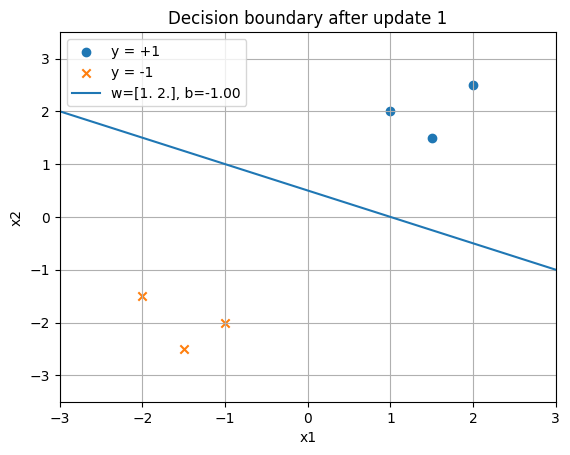

In [22]:
class Perceptron:
    def __init__(self, w=None, b=0.0):
        self.w = w
        self.b = b
        self.history = []  

    def predict(self, x):
        if self.w is None:
            self.w = np.zeros_like(x, dtype=float)
        s = float(np.dot(self.w, x) + self.b)
        return 1 if s >= 0 else -1

    def train_step(self, x, y):
        if self.w is None:
            self.w = np.zeros_like(x, dtype=float)

        prediction = self.predict(x)

        self.history.append({
            'w': self.w.copy(),
            'b': float(self.b),
            'x': x.copy(),
            'y': int(y),
            'pred': int(prediction),
            'correct': (prediction == y)
        })

        if prediction != y:
            self.w = self.w + (y * x)
            self.b = self.b + y
            return False  # Made an update
        return True  # Correct prediction

X_pos = np.array([
    [1.0,  2.0],
    [2.0,  2.5],
    [1.5,  1.5]
])
X_neg = np.array([
    [-1.0, -2.0],
    [-2.0, -1.5],
    [-1.5, -2.5]
])

X_perceptron = np.vstack([X_pos, X_neg])
y_perceptron = np.array([1, 1, 1, -1, -1, -1], dtype=int)

p = Perceptron()
updates = 0
for epoch in range(100):
    any_update = False
    for x, y in zip(X_perceptron, y_perceptron):
        updated = not p.train_step(x, y)
        if updated:
            updates += 1
            any_update = True
    if not any_update:
        break

print('Updates:', updates)
print('Final w:', p.w, 'b:', p.b)
print('\nLast history entries (most recent first):')
for entry in p.history[-10:][::-1]:
    print(entry)


def plot_decision_boundary(ax, w, b, X, y, title=""):
    ax.clear()

    pos = (y == 1)
    neg = (y == -1)
    ax.scatter(X[pos, 0], X[pos, 1], marker='o', label='y = +1')
    ax.scatter(X[neg, 0], X[neg, 1], marker='x', label='y = -1')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xs = np.linspace(x_min, x_max, 200)

    w = np.asarray(w, dtype=float)
    if abs(w[1]) > 1e-8:
        ys = -(w[0] * xs + b) / w[1]
        ax.plot(xs, ys, label=f"w={w}, b={b:.2f}")
    else:
        if abs(w[0]) > 1e-8:
            x_vert = -b / w[0]
            ax.axvline(x_vert, label=f"x = {x_vert:.2f}")

    ax.set_xlim(x_min, x_max)
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)
    ax.legend()
    ax.grid(True)


fig, ax = plt.subplots()
update_idx = 0

for h in p.history:
    if h['correct']:
        continue

    update_idx += 1

    w_before = np.array(h['w'], dtype=float)
    b_before = float(h['b'])
    x = np.array(h['x'], dtype=float)
    y_true = int(h['y'])

    w_after = w_before + y_true * x
    b_after = b_before + y_true

    plot_decision_boundary(
        ax, w_after, b_after,
        X_perceptron, y_perceptron,
        title=f"Decision boundary after update {update_idx}"
    )
    plt.pause(0.5)

plot_decision_boundary(
    ax, np.array(p.w, dtype=float), float(p.b),
    X_perceptron, y_perceptron,
    title="Final converged decision boundary"
)
plt.show()